##### Name: Frank Lin
##### Date: 11/8/2025
##### Description: 
Analysis of correlation between value and age and mileage for Porsche and Jaguar cars.

In [94]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Data Loading

In [95]:
# Load both datasets
porsche = pd.read_csv('Porsche.csv')
jaguar = pd.read_csv('Jaguar.csv')

## Exploratory Data Analysis (EDA)

### Porsche Dataset

In [96]:
print("Porsche Dataset Summary:")
print("-" * 20)
print("\nFirst few rows:")
display(porsche.head())
print("\nDataset Info:")
porsche.info()

Porsche Dataset Summary:
--------------------

First few rows:


,Unnamed: 0,Price,Age,Mileage
0,1,69.4,3,21.5
1,2,56.9,3,43.0
2,3,49.9,2,19.9
3,4,47.4,4,36.0
4,5,42.9,4,44.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Price       30 non-null     float64
 2   Age         30 non-null     int64  
 3   Mileage     30 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


### Jaguar Dataset

In [97]:
print("Jaguar Dataset Summary:")
print("-" * 20)
print("\nFirst few rows:")
display(jaguar.head())
print("\nDataset Info:")
jaguar.info()

Jaguar Dataset Summary:
--------------------

First few rows:


,Unnamed: 0,Price,Age,Mileage
0,1,13.9,5,47.7
1,2,19.9,6,44.6
2,3,25.9,4,35.3
3,4,46.9,2,19.6
4,5,12.9,7,71.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Price       30 non-null     float64
 2   Age         30 non-null     int64  
 3   Mileage     30 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.1 KB


## Creating Combined Dataset

In [98]:
# Add make column to both datasets
porsche['Make'] = 'Porsche'
jaguar['Make'] = 'Jaguar'

# Combine the datasets
combined = pd.concat([porsche, jaguar])
print("Combined Dataset Shape:", combined.shape)
display(combined.head())

Combined Dataset Shape: (60, 5)


,Unnamed: 0,Price,Age,Mileage,Make
0,1,69.4,3,21.5,Porsche
1,2,56.9,3,43.0,Porsche
2,3,49.9,2,19.9,Porsche
3,4,47.4,4,36.0,Porsche
4,5,42.9,4,44.0,Porsche


## Price vs Age Analysis

In [99]:
# Fit regression models
porsche_age_model = smf.ols(formula='Price ~ Age', data=porsche).fit()
jaguar_age_model = smf.ols(formula='Price ~ Age', data=jaguar).fit()
combined_age_model = smf.ols(formula='Price ~ Age', data=combined).fit()

# Print model summaries
print("Porsche Price-Age Model Summary:")
print("-" * 30)
display(porsche_age_model.summary())
print("\nJaguar Price-Age Model Summary:")
print("-" * 30)
display(jaguar_age_model.summary())
print("\nCombined Price-Age Model Summary:")
print("-" * 30)
display(combined_age_model.summary())

Porsche Price-Age Model Summary:
------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     44.04
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           3.36e-07
Time:                        00:03:04   Log-Likelihood:                -110.19
No. Observations:                  30   AIC:                             224.4
Df Residuals:                      28   BIC:                             227.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.3750      2.643     23.982      0.000      57.962      68.788
Age           -2.0707      0.312     -6.637      0.000      -2.710      -1.432
==============================================================================
Omnibus:                        4.339   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                1.682
Skew:                           0.111   Prob(JB):                        0.431
Kurtosis:                       1.862   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Jaguar Price-Age Model Summary:
------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     28.67
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           1.05e-05
Time:                        00:03:04   Log-Likelihood:                -116.12
No. Observations:                  30   AIC:                             236.2
Df Residuals:                      28   BIC:                             239.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.9884      5.164     11.035      0.000      46.409      67.567
Age           -5.0399      0.941     -5.354      0.000      -6.968      -3.112
==============================================================================
Omnibus:                        3.790   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                1.766
Skew:                           0.250   Prob(JB):                        0.414
Kurtosis:                       1.922   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Combined Price-Age Model Summary:
------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     21.30
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           2.22e-05
Time:                        00:03:04   Log-Likelihood:                -250.57
No. Observations:                  60   AIC:                             505.1
Df Residuals:                      58   BIC:                             509.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.2460      3.322     16.026      0.000      46.595      59.897
Age           -2.1491      0.466     -4.616      0.000      -3.081      -1.217
==============================================================================
Omnibus:                       10.931   Durbin-Watson:                   0.766
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.222
Skew:                          -0.120   Prob(JB):                        0.200
Kurtosis:                       1.891   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

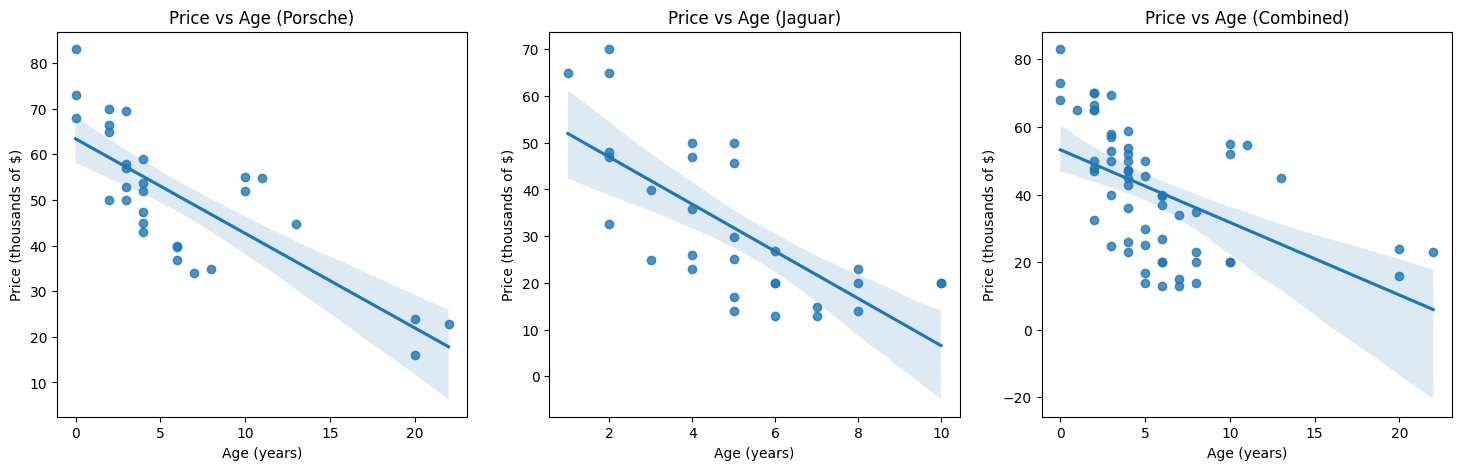

In [100]:
# Create subplots for Price vs Age
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Porsche plot
sns.regplot(x='Age', y='Price', data=porsche, ax=ax1)
ax1.set_title('Price vs Age (Porsche)')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Price (thousands of $)')

# Jaguar plot
sns.regplot(x='Age', y='Price', data=jaguar, ax=ax2)
ax2.set_title('Price vs Age (Jaguar)')
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Price (thousands of $)')

# Combined plot
sns.regplot(x='Age', y='Price', data=combined, ax=ax3)
ax3.set_title('Price vs Age (Combined)')
ax3.set_xlabel('Age (years)')
ax3.set_ylabel('Price (thousands of $)')

plt.show()

## Price vs Mileage Analysis

In [101]:
# Fit regression models
porsche_mileage_model = smf.ols(formula='Price ~ Mileage', data=porsche).fit()
jaguar_mileage_model = smf.ols(formula='Price ~ Mileage', data=jaguar).fit()
combined_mileage_model = smf.ols(formula='Price ~ Mileage', data=combined).fit()

# Print model summaries
print("Porsche Price-Mileage Model Summary:")
print("-" * 30)
display(porsche_mileage_model.summary())
print("\nJaguar Price-Mileage Model Summary:")
print("-" * 30)
display(jaguar_mileage_model.summary())
print("\nCombined Price-Mileage Model Summary:")
print("-" * 30)
display(combined_mileage_model.summary())

Porsche Price-Mileage Model Summary:
------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     108.3
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           3.98e-11
Time:                        00:03:05   Log-Likelihood:                -100.63
No. Observations:                  30   AIC:                             205.3
Df Residuals:                      28   BIC:                             208.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0905      2.370     29.998      0.000      66.236      75.945
Mileage       -0.5894      0.057    -10.405      0.000      -0.705      -0.473
==============================================================================
Omnibus:                        1.943   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                0.860
Skew:                          -0.332   Prob(JB):                        0.651
Kurtosis:                       3.496   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Jaguar Price-Mileage Model Summary:
------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     40.36
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           7.11e-07
Time:                        00:03:05   Log-Likelihood:                -113.31
No. Observations:                  30   AIC:                             230.6
Df Residuals:                      28   BIC:                             233.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.2275      4.035     13.441      0.000      45.963      62.492
Mileage       -0.6203      0.098     -6.353      0.000      -0.820      -0.420
==============================================================================
Omnibus:                        0.220   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.896   Jarque-Bera (JB):                0.417
Skew:                          -0.112   Prob(JB):                        0.812
Kurtosis:                       2.468   Cond. No.                         83.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Combined Price-Mileage Model Summary:
------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     64.63
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           5.26e-11
Time:                        00:03:05   Log-Likelihood:                -237.49
No. Observations:                  60   AIC:                             479.0
Df Residuals:                      58   BIC:                             483.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.9284      3.169     19.858      0.000      56.585      69.272
Mileage       -0.6127      0.076     -8.039      0.000      -0.765      -0.460
==============================================================================
Omnibus:                        3.108   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.934
Skew:                          -0.477   Prob(JB):                        0.231
Kurtosis:                       2.488   Cond. No.                         79.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

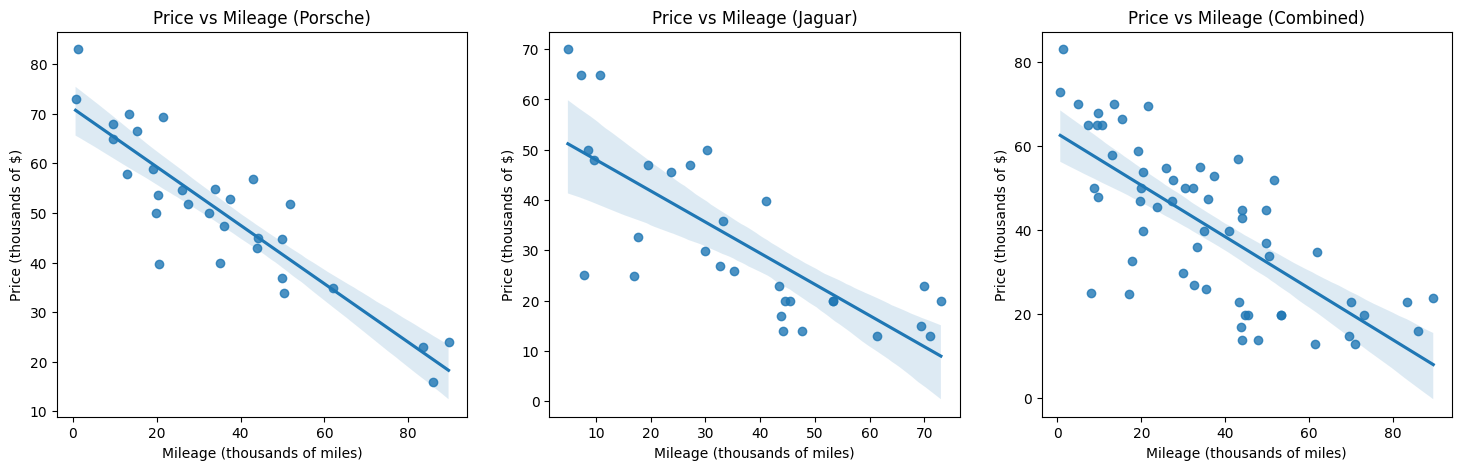

In [102]:
# Create subplots for Price vs Mileage
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Porsche plot
sns.regplot(x='Mileage', y='Price', data=porsche, ax=ax1)
ax1.set_title('Price vs Mileage (Porsche)')
ax1.set_xlabel('Mileage (thousands of miles)')
ax1.set_ylabel('Price (thousands of $)')

# Jaguar plot
sns.regplot(x='Mileage', y='Price', data=jaguar, ax=ax2)
ax2.set_title('Price vs Mileage (Jaguar)')
ax2.set_xlabel('Mileage (thousands of miles)')
ax2.set_ylabel('Price (thousands of $)')

# Combined plot
sns.regplot(x='Mileage', y='Price', data=combined, ax=ax3)
ax3.set_title('Price vs Mileage (Combined)')
ax3.set_xlabel('Mileage (thousands of miles)')
ax3.set_ylabel('Price (thousands of $)')

plt.show()

## Multiple Regression Analysis (Price ~ Age + Mileage)

In [103]:
# Fit multiple regression model
multiple_reg_model = smf.ols(formula='Price ~ Age + Mileage', data=combined).fit()

# Display model summary
print("Multiple Regression Model Summary (Price ~ Age + Mileage):")
print("-" * 50)
display(multiple_reg_model.summary())

Multiple Regression Model Summary (Price ~ Age + Mileage):
--------------------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     32.54
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           3.74e-10
Time:                        00:03:06   Log-Likelihood:                -237.11
No. Observations:                  60   AIC:                             480.2
Df Residuals:                      57   BIC:                             486.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.9497      3.176     19.820      0.000      56.590      69.310
Age            0.5163      0.601      0.859      0.394      -0.687       1.719
Mileage       -0.6947      0.122     -5.682      0.000      -0.940      -0.450
==============================================================================
Omnibus:                        3.095   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.971
Skew:                          -0.527   Prob(JB):                        0.226
Kurtosis:                       2.724   Cond. No.                         80.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

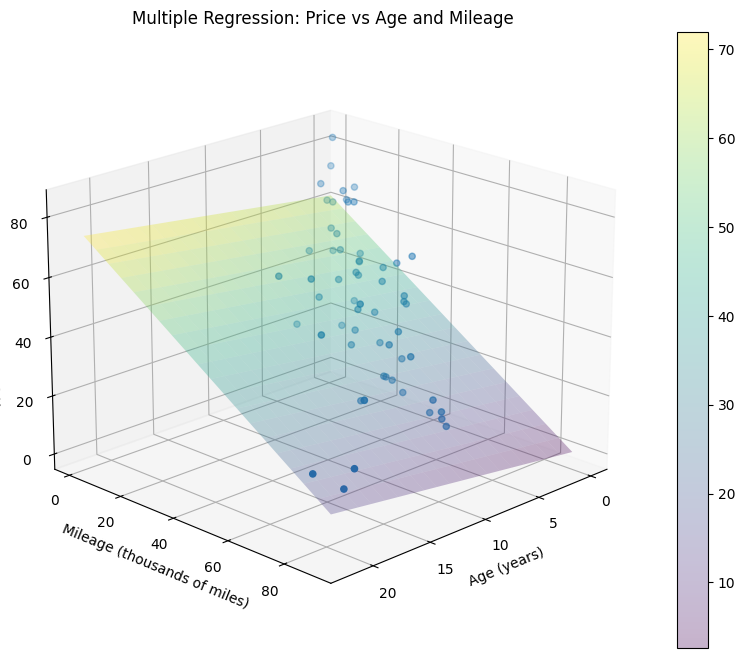

In [104]:
# Create meshgrid for the regression plane
age_range = np.linspace(combined['Age'].min(), combined['Age'].max(), 20)
mileage_range = np.linspace(combined['Mileage'].min(), combined['Mileage'].max(), 20)
age_mesh, mileage_mesh = np.meshgrid(age_range, mileage_range)

# Calculate predicted prices for the mesh
mesh_df = pd.DataFrame({
    'Age': age_mesh.flatten(),
    'Mileage': mileage_mesh.flatten()
})
price_pred = multiple_reg_model.predict(mesh_df)
price_mesh = price_pred.values.reshape(age_mesh.shape)

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot scatter points
scatter = ax.scatter(combined['Age'], combined['Mileage'], combined['Price'])

# Plot regression plane
surface = ax.plot_surface(age_mesh, mileage_mesh, price_mesh, alpha=0.3,
                         cmap='viridis')

# Customize the plot
ax.set_xlabel('Age (years)')
ax.set_ylabel('Mileage (thousands of miles)')
ax.set_zlabel('Price (thousands of $)')
ax.set_title('Multiple Regression: Price vs Age and Mileage')

plt.colorbar(surface)
ax.view_init(elev=20, azim=45)

plt.show()

### Multiple Regression Models by Make

In [105]:
# Calculate multiple regression models for each dataset
porsche_multi_model = smf.ols(formula='Price ~ Age + Mileage', data=porsche).fit()
jaguar_multi_model = smf.ols(formula='Price ~ Age + Mileage', data=jaguar).fit()
combined_multi_model = smf.ols(formula='Price ~ Age + Mileage', data=combined).fit()

# Function to format regression equation
def format_regression_equation(model, dataset_name):
    coef = model.params
    print(f"\n{dataset_name} Multiple Regression Equation:")
    print("-" * 40)
    equation = f"Price = {coef[0]:.3f}"
    equation += f" + ({coef['Age']:.3f} × Age)"
    equation += f" + ({coef['Mileage']:.3f} × Mileage)"
    print(equation)
    print(f"R-squared: {model.rsquared:.4f}")
    print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
    print(f"P-value: {model.f_pvalue:.4e}")

# Display equations and statistics
format_regression_equation(porsche_multi_model, "Porsche")
format_regression_equation(jaguar_multi_model, "Jaguar")
format_regression_equation(combined_multi_model, "Combined")


Porsche Multiple Regression Equation:
----------------------------------------
Price = 70.919 + (-0.130 × Age) + (-0.561 × Mileage)
R-squared: 0.7951
Adjusted R-squared: 0.7799
P-value: 5.0732e-10

Jaguar Multiple Regression Equation:
----------------------------------------
Price = 57.886 + (-2.044 × Age) + (-0.439 × Mileage)
R-squared: 0.6235
Adjusted R-squared: 0.5956
P-value: 1.8775e-06

Combined Multiple Regression Equation:
----------------------------------------
Price = 62.950 + (0.516 × Age) + (-0.695 × Mileage)
R-squared: 0.5331
Adjusted R-squared: 0.5167
P-value: 3.7436e-10


C:\Users\fclin\AppData\Local\Temp\ipykernel_13476\892224741.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = f"Price = {coef[0]:.3f}"


### Price Predictions for Specific Car Scenarios

In [106]:
# Define scenario constants
AGE_YEARS = 10
MILEAGE_THOUSANDS = 55

# Create a function to show prediction calculation steps
def calculate_price_prediction(model, car_type):
    # Get coefficients
    intercept = model.params[0]
    age_coef = model.params['Age']
    mileage_coef = model.params['Mileage']
    
    # Calculate components
    base_price = intercept
    age_effect = age_coef * AGE_YEARS
    mileage_effect = mileage_coef * MILEAGE_THOUSANDS
    
    # Calculate total predicted price
    predicted_price = base_price + age_effect + mileage_effect
    
    # Display calculation steps
    print(f"\n{car_type} Price Prediction:")
    print("-" * 40)
    print(f"Base Price (Intercept) = ${base_price:,.3f}")
    print(f"Age Effect ({AGE_YEARS} years × ${age_coef:,.3f}) = ${age_effect:,.3f}")
    print(f"Mileage Effect ({MILEAGE_THOUSANDS}k miles × ${mileage_coef:,.3f}) = ${mileage_effect:,.3f}")
    print("-" * 40)
    print(f"Predicted Price = ${predicted_price:,.3f}")
    return predicted_price

# Calculate predictions for each model
porsche_price = calculate_price_prediction(porsche_multi_model, "Porsche")
jaguar_price = calculate_price_prediction(jaguar_multi_model, "Jaguar")
combined_price = calculate_price_prediction(combined_multi_model, "General Sports Car")


Porsche Price Prediction:
----------------------------------------
Base Price (Intercept) = $70.919
Age Effect (10 years × $-0.130) = $-1.302
Mileage Effect (55k miles × $-0.561) = $-30.873
----------------------------------------
Predicted Price = $38.743

Jaguar Price Prediction:
----------------------------------------
Base Price (Intercept) = $57.886
Age Effect (10 years × $-2.044) = $-20.442
Mileage Effect (55k miles × $-0.439) = $-24.169
----------------------------------------
Predicted Price = $13.276

General Sports Car Price Prediction:
----------------------------------------
Base Price (Intercept) = $62.950
Age Effect (10 years × $0.516) = $5.163
Mileage Effect (55k miles × $-0.695) = $-38.211
----------------------------------------
Predicted Price = $29.901


C:\Users\fclin\AppData\Local\Temp\ipykernel_13476\3423958075.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]


### Analysis
1) For Porsche, Jaguar, and all sportscars, the combined model using both factors of mileage and age showed stronger correlation with the value.

2) 
(Price is in Thousands of Dollars, Age is in years, Mileage is in thousands of Miles)

Porsche:
Price = 70.919 + (-0.130 × Age) + (-0.561 × Mileage)

Jaguar:
Price = 57.886 + (-2.044 × Age) + (-0.439 × Mileage)

Combined:
Price = 62.950 + (0.516 × Age) + (-0.695 × Mileage)

3) 
Porsche: $38,743

Jaguar: $13,276

General Sports Car: $29,901

4) For Porsches, the combined model was less accurate. For Jaguars, the combined model was marginally more accurate. However, the general model is not appropriate for either because there are significant price differences, but more importantly, different depreciation patterns between the two brands, and the nuance is lost in the combined model.